In [38]:
pip install alpha_vantage

In [1]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
df_confirm = pd.read_csv ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_country = pd.read_csv (r"C:\Users\uvdob\Downloads\country_code_mapping.csv")

In [3]:
df_confirm

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,178387,178418,178457,178513,178574,178611,178638,178648,178689,178745
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,274462,274504,274520,274535,274606,274606,274737,274791,274828,274828
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265739,265739,265741,265746,265746,265754,265761,265761,265767,265771
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,40709,40709,40709,40709,41013,41013,41013,41013,41013,41013
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,656617,656617,656617,656876,656876,656876,656876,656876,656876,656876
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11817,11817,11818,11818,11818,11818,11818,11818,11818,11818
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,318467,318515,318515,318640,318640,318984,318984,318984,318984,319316


In [4]:
df_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7676,7678,7679,7680,7680,7680,7680,7681,7682,7683
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3496,3496,3496,3496,3496
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6875,6875
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5656,5656,5656,5657,5657,5657,5657,5657,5657,5657
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2148,2148,2148,2148,2148,2148,2148,2148,2149,2149
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3973,3973,3973,3973,3973,3974,3974,3974,3974,3976


In [5]:
df_country

,country,alpha-2_code,alpha-3_code,numeric_code,iso_3166-2
0,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248.0,ISO 3166-2:AX
2,Albania,AL,ALB,8.0,ISO 3166-2:AL
3,Algeria,DZ,DZA,12.0,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16.0,ISO 3166-2:AS
...,...,...,...,...,...
244,Western Sahara,EH,ESH,732.0,ISO 3166-2:EH
245,Yemen,YE,YEM,887.0,ISO 3166-2:YE
246,Zambia,ZM,ZMB,894.0,ISO 3166-2:ZM
247,Zimbabwe,ZW,ZWE,716.0,ISO 3166-2:ZW


In [6]:
df1=pd.DataFrame(df_confirm) 
df2=pd.DataFrame(df_death)

In [7]:
df1['Total Confirmed Cases']=df1.iloc[:,4:].sum(axis=1)
df2['Total Deaths']=df2.iloc[:,4:].sum(axis=1)
df1.rename(columns={'Country/Region': 'Country'}, inplace=True)
df3=df1[['Country','Total Confirmed Cases']]
df4=df2[['Country/Region','Total Deaths']]
result = pd.concat([df3, df4], axis=1, join='inner')
#display(result)
df=pd.DataFrame(result)
df.drop(df.columns[2], axis=1, inplace=True)
df

,Country,Total Confirmed Cases,Total Deaths
0,Afghanistan,67638998,2943222
1,Albania,84857095,1352122
2,Algeria,97086858,2713864
3,Andorra,9966691,77266
4,Angola,27318993,622394
...,...,...,...
279,West Bank and Gaza,193250942,1944712
280,Winter Olympics 2022,44332,0
281,Yemen,4094099,830178
282,Zambia,90415414,1354545


In [8]:
df_merge = df.merge(dfcountry,left_on='Country',right_on='country',how='inner')
#df_merge.drop(df_merge.columns[5], axis=1, inplace=True)
df_merge = df_merge.drop(columns=['country','alpha-3_code','numeric_code'])
df_merge

NameError: name 'dfcountry' is not defined

In [9]:
api_key = 'PXFZN4HC8RMSJ3EM'
ts= TimeSeries(key=api_key,output_format='pandas')
america=ts.get_monthly_adjusted('IBM')
canada=ts.get_monthly_adjusted('TSCO.LON')
travel=ts.get_monthly_adjusted('REMAX')
#ndata=ts.get_daily('AAPL')

In [12]:
print(len(america[0]), "America dataset")
df_america=pd. DataFrame(america[0]) 
print(len(canada[0]), "Canada dataset")
df_canada=pd. DataFrame(canada[0]) 
print(len(travel[0]), "travel dataset")
df_travel=pd. DataFrame(travel[0])

269 America dataset
207 Canada dataset
171 travel dataset


In [13]:
df_america = df_america.reset_index(level=0)
df_canada = df_canada.reset_index(level=0)
df_travel = df_travel.reset_index(level=0)

In [14]:
#Removes unneccesory columns from the dataset. and changing their column names
df_america
df_a= df_america.drop(['1. open','4. close', '5. adjusted close', '6. volume','7. dividend amount'], axis=1)
df_c= df_canada.drop(['1. open','4. close', '5. adjusted close', '6. volume','7. dividend amount'], axis=1)
df_t= df_travel.drop(['1. open','4. close', '5. adjusted close', '6. volume','7. dividend amount'], axis=1)
df_c.rename(columns={"2. high":"Canada High", "3. low":"Canada Low"},inplace=True)
df_a.rename(columns={"2. high":"America High", "3. low":"America Low"},inplace=True)
df_t.rename(columns={"2. high":"Travel High", "3. low":"Travel Low"},inplace=True)

In [47]:
can_am = pd.merge(df_a, df_c)
can_am = pd.merge(df_t)
can_am

TypeError: merge() missing 1 required positional argument: 'right'

Text(0, 0.5, 'Y-axis ')

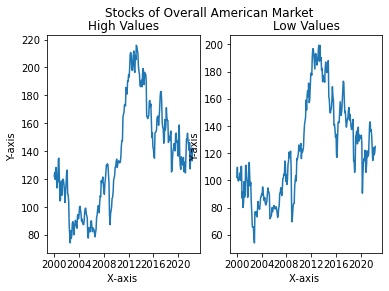

In [33]:
#df_america.plot(x="date", y=["2. high"], kind="line")
#df_america.plot(x="date", y=["3. low"], kind="line")
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(df_america['date'], df_america['2. high'])
plt.title("High Values")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.suptitle('Stocks of Overall American Market')

plt.subplot(1, 2, 2) # index 2
plt.plot(df_america['date'], df_america['3. low'])
plt.title("Low Values")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

Text(0, 0.5, 'Y-axis ')

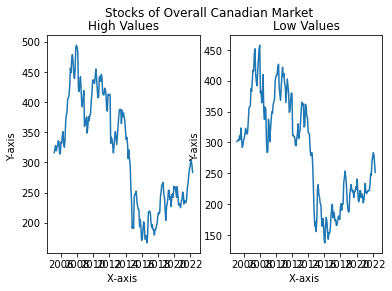

In [34]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(df_canada['date'], df_canada['2. high'])
plt.title("High Values")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.suptitle('Stocks of Overall Canadian Market')

plt.subplot(1, 2, 2) # index 2
plt.plot(df_canada['date'], df_canada['3. low'])
plt.title("Low Values")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

Text(0, 0.5, 'Y-axis ')

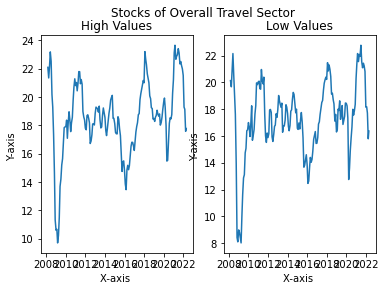

In [35]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(df_travel['date'], df_travel['2. high'])
plt.title("High Values")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.suptitle('Stocks of Overall Travel Sector')

plt.subplot(1, 2, 2) # index 2
plt.plot(df_travel['date'], df_travel['3. low'])
plt.title("Low Values")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

In [38]:
#Append the datas to the first dataframes
main_frame = [df, can_am]
  
result = pd.concat(main_frame)
display(result)


,Country,Total Confirmed Cases,Total Deaths,date,America High,America Low,Canada High,Canada Low
0,Afghanistan,67638998.0,2943222.0,NaT,NaN,NaN,NaN,NaN
1,Albania,84857095.0,1352122.0,NaT,NaN,NaN,NaN,NaN
2,Algeria,97086858.0,2713864.0,NaT,NaN,NaN,NaN,NaN
3,Andorra,9966691.0,77266.0,NaT,NaN,NaN,NaN,NaN
4,Angola,27318993.0,622394.0,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
198,NaN,NaN,NaN,2005-06-30,77.73,73.45,323.7501,310.5001
199,NaN,NaN,NaN,2005-05-31,78.11,72.50,319.2501,303.0001
200,NaN,NaN,NaN,2005-04-29,91.76,71.85,328.0001,304.2501
201,NaN,NaN,NaN,2005-03-31,93.73,89.09,322.5001,303.0001
